In [32]:
import geopandas
import geoplot

world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres'))

In [33]:
Antarctica = world[world['name'] == 'Antarctica'].iloc[0].name
world = world.drop(world.index[Antarctica])
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [34]:
from ipynb.fs.full.Clustering_Std_KMEANS import *


In [35]:
cluster_map

,data_index,cluster
0,DZA,5
1,TUR,6
2,SYC,7
3,ZWE,6
4,MWI,6
...,...,...
214,CRI,4
215,GNB,5
216,USA,9
217,AFG,1


In [36]:
# add lacking country codeds
world.loc[world.name=='France','iso_a3'] = 'FRA'
world.loc[world.name=='Norway','iso_a3'] = 'NOR'
world.loc[world.name=='Somaliland','iso_a3'] = 'SOM'
world.loc[world.name=='N. Cyprus','iso_a3'] = 'CYP'
world.loc[world.name=='Kosovo','iso_a3'] = 'FRY'

In [37]:
merged = world.merge(cluster_map, left_on='iso_a3', right_on='data_index')
merged

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,data_index,cluster
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",FJI,5
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",TZA,5
2,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CAN,6
3,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",USA,9
4,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",KAZ,4
...,...,...,...,...,...,...,...,...
159,11901484,Africa,Rwanda,RWA,21970.0,"POLYGON ((30.41910 -1.13466, 30.81613 -1.69891...",RWA,0
160,2103721,Europe,Macedonia,MKD,29520.0,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",MKD,5
161,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",SRB,5
162,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",TTO,6


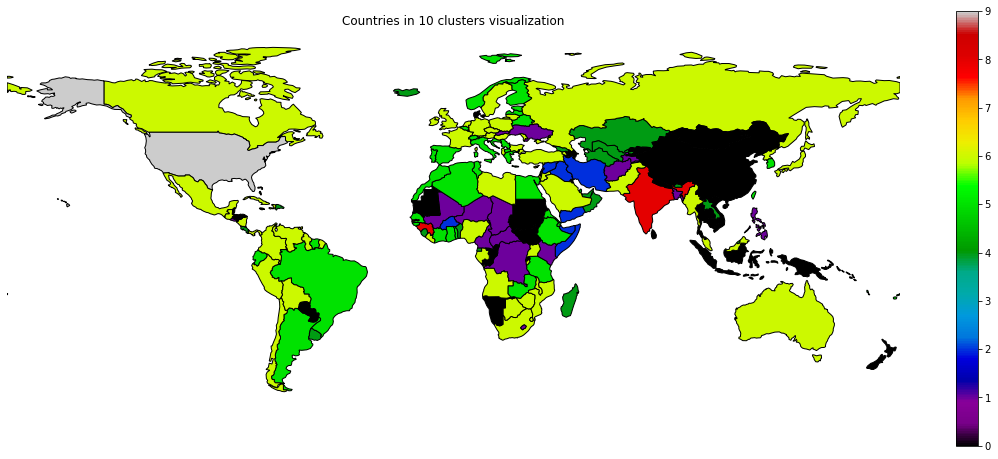

In [38]:
import mapclassify

# Note: this code sample requires geoplot>=0.4.0.
g = geoplot.choropleth(
    merged, hue=merged.cluster, figsize=(8, 4), legend=True, cmap='nipy_spectral'
)
g.set_title("Countries in 10 clusters visualization")
g.figure.set_size_inches(20,8)